In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [662]:
# x = np.linspace(0, 1000, num=5000)
x = np.random.randn(1000, 1) * 1000
f = lambda x: x ** 2
y = f(x)

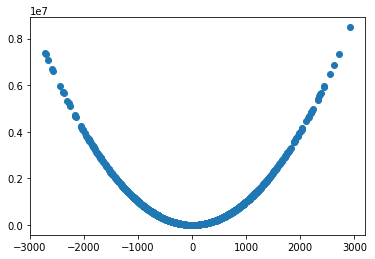

In [663]:
plt.scatter(x, y);

In [608]:
def random_initializer(n, m, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.random.randn(n, m) * .01

def zero_initializer(n, m):
    return np.zeros((n, m))

In [609]:
class Linear:
    def __init__(self):
        self.last_input = None
    
    def forward(self, X):
        self.last_input = X
        return X
    
    def backward(self, dY):
        s = self.last_input
        return s * dY
    
    def __repr__(self):
        return 'linear'

class Sigmoid:
    def __init__(self):
        self.last_input = None
    
    def forward(self, X):
        self.last_input = X
        return self._sigmoid(X)
    
    def backward(self, dY):
        s = self._sigmoid(self.last_input)
        return s * (1 - s) * dY
    
    def _sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def __repr__(self):
        return 'sigmoid'

In [610]:
class Layer:
    def __init__(self, input_dim, output_dim, activation=None):
        """ Linear -> Activation dense layer """
        self.input_dim, self.output_dim = input_dim, output_dim
        self.activation = activation
        self.last_input = None
        
        self.W = random_initializer(output_dim, input_dim)
        self.b = zero_initializer(output_dim, 1)
    
    def forward_propagate(self, X):
        self.last_input = X  # Cache last input
#         print(f"W.shape={self.W.shape} | X.shape={X.shape}")
        Z = self.W @ X + self.b
        if self.activation:
            return self.activation.forward(Z)
        else:
            return Z

    def backward_propagate(self, dA):
        
        if self.activation:
            dZ = self.activation.backward(dA)
        else:
            dZ = dA
#         print(f"last_input_shape={self.last_input.shape}, dZ.shape={dZ.shape}")
        dW = dZ @ self.last_input.T / len(dZ)
        db = np.sum(dZ, axis=1, keepdims=True) / len(dZ)
#         print(f"dZ.shape={dZ.shape}, W.shape={self.W.shape}")
        dA = self.W.T @ dZ
        return dA, dW, db
    
    def __repr__(self):
        return f"{self.activation} # params = {self._n_params()}"
    
    def _n_params(self):
        w = self.W.shape[0] * self.W.shape[1]
        b = self.b.shape[0]
        return w + b

In [611]:
class Optimizer:
    def __init__(self):
        """ Class responsible for training process """
        pass
    

class GradientDescent:
    def __init__(self, learning_rate=.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def update(self, theta, grad):
        return theta - self.learning_rate * grad

In [612]:
class MSE:
    def forward(self, Y, Y_pred):
        return np.sum(np.power(Y - Y_pred, 2))
    
    def backward(self, Y, Y_pred):
        return -2 * (Y - Y_pred) / Y.shape[1]

    def __repr__(self):
        return 'MSE'

In [613]:
class History:
    def __init__(self):
        self.h = []
    
    def add(self, log):
        self.h.append(log)

In [614]:
class NeuralNetwork:
    def __init__(self, n_iterations=100, learning_rate=0.01, loss=MSE(), verbose=True):
        """ Class containing Neural Network architecture: Layers and Optimizer """
        self.layers = []
        # Optimizer stuff
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.loss = loss
        self.verbose = verbose
    
    def fit(self, X, Y):
        for i in range(self.n_iterations):
            y_pred = self.forward_(X)
            cost = self.loss.forward(Y, y_pred)
            if (self.verbose and i % 1 == 0):
                print(f"{i}: {self.loss}={cost}")
            self.backward_(Y, y_pred)
    
    def forward_(self, X):
        for l in self.layers:
            X = l.forward_propagate(X)
        return X
    
    def backward_(self, Y, Y_pred):
        dA = self.loss.backward(Y, Y_pred)
        for i, l in enumerate(reversed(self.layers)):
#             print(f"dA{i}={dA}")
            dA, dW, db = l.backward_propagate(dA)
#             print(f"dW{i}={dW}, W{i}={l.W}")
            l.W -= self.learning_rate * dW
#             print(f"W.shape={l.W.shape} | dW.shape={dW.shape}")
            l.b -= self.learning_rate * db
    
    def predict(self, X):
        pass
    
    def add(self, layer):
        self.layers.append(layer)
    
    def summary(self):
        return '\n'.join([repr(l) for l in self.layers])

In [645]:
model = NeuralNetwork(n_iterations=100, learning_rate=0.01, verbose=True)
model.add(Layer(1, 2, activation=Sigmoid()))
model.add(Layer(2, 2, activation=Sigmoid()))
model.add(Layer(2, 1, activation=None))

In [664]:
if len(x.shape) < 2:
    x = x[:, np.newaxis]
if len(y.shape) < 2:
    y = y[:, np.newaxis]

In [665]:
x_ok = (x - x.mean()) / x.std()

In [666]:
model.fit(x_ok.T, y.T)

0: MSE=2726359863329250.0
1: MSE=2612592002000334.0
2: MSE=2512066719730104.5
3: MSE=2423242580316129.0
4: MSE=2344757570729941.0
5: MSE=2275408216259585.0
6: MSE=2214131126649577.8
7: MSE=2159986690270175.5
8: MSE=2112144666285336.0
9: MSE=2069871453892332.0
10: MSE=2032518843421873.0
11: MSE=1999514076810176.0
12: MSE=1970351065032080.5
13: MSE=1944582627824955.0
14: MSE=1921813636708739.2
15: MSE=1901694956158450.8
16: MSE=1883918090024216.0
17: MSE=1868210451108006.0
18: MSE=1854331181361643.0
19: MSE=1842067458613756.8
20: MSE=1831231233193724.2
21: MSE=1821656344412583.5
22: MSE=1813195972685568.0
23: MSE=1805720388227576.5
24: MSE=1799114961800495.5
25: MSE=1793278407009526.5
26: MSE=1788121227196226.8
27: MSE=1783564343113194.5
28: MSE=1779537880337427.8
29: MSE=1775980097828760.0
30: MSE=1772836441204101.0
31: MSE=1770058706210552.8
32: MSE=1767604299570253.2
33: MSE=1765435585862885.0
34: MSE=1763519310431054.0
35: MSE=1761826089459488.0
36: MSE=1760329959409012.5
37: MSE=175

/home/ptyshevskyi/envs/loc_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


In [667]:
import keras

In [729]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [730]:
kmodel = Sequential()
kmodel.add(Dense(1, activation='tanh'))
kmodel.add(Dense(1))

In [742]:
kmodel.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01))

In [770]:
kmodel = Sequential()
kmodel.add(Dense(10, activation='relu'))
kmodel.add(Dense(1))
kmodel.compile(loss='mean_squared_error', optimizer='sgd')

x = np.array([1, 2, 3, 4])[:, np.newaxis]
y = x ** 2
x_normed = (x - x.mean()) / x.std()
kmodel.fit(x_normed, y, epochs=5000, verbose=0, shuffle=True)

In [771]:
x_test = np.linspace(-25, 25)
y_test = x ** 2
y_pred = kmodel.predict(x_test)

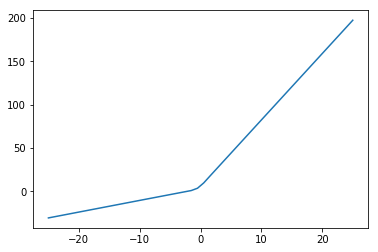

In [772]:
plt.plot(x_test, y_pred)

In [773]:
kmodel.predict([6])

array([[51.731808]], dtype=float32)

In [704]:
kmodel.predict([7])

array([[10.998047]], dtype=float32)

In [491]:
for y_i, y_pred_i in zip(y, kmodel.predict(x_ok)):
    print(y_i, y_pred_i)

[0.] [0.00012207]
[2.00400802] [2.0041199]
[4.00801603] [4.0081177]
[6.01202405] [6.0121155]
[8.01603206] [8.016144]
[10.02004008] [10.020142]
[12.0240481] [12.024139]
[14.02805611] [14.028137]
[16.03206413] [16.032166]
[18.03607214] [18.036163]
[20.04008016] [20.040192]
[22.04408818] [22.04419]
[24.04809619] [24.048187]
[26.05210421] [26.052185]
[28.05611222] [28.056183]
[30.06012024] [30.06018]
[32.06412826] [32.06418]
[34.06813627] [34.068207]
[36.07214429] [36.072205]
[38.0761523] [38.076233]
[40.08016032] [40.08023]
[42.08416834] [42.08423]
[44.08817635] [44.088226]
[46.09218437] [46.092255]
[48.09619238] [48.096252]
[50.1002004] [50.10025]
[52.10420842] [52.104248]
[54.10821643] [54.108246]
[56.11222445] [56.112244]
[58.11623246] [58.116302]
[60.12024048] [60.1203]
[62.1242485] [62.1243]
[64.12825651] [64.128296]
[66.13226453] [66.13229]
[68.13627255] [68.13629]
[70.14028056] [70.14029]
[72.14428858] [72.14432]
[74.14829659] [74.148315]
[76.15230461] [76.15231]
[78.15631263] [78.

In [420]:
model.layers[2].b

array([[238.50062172]])

In [487]:
x.std()

289.2530633707077